In [4]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,MaxPooling2D,Convolution2D,Activation

#Initialising the CNN
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#Compiling the CNN
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


#Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


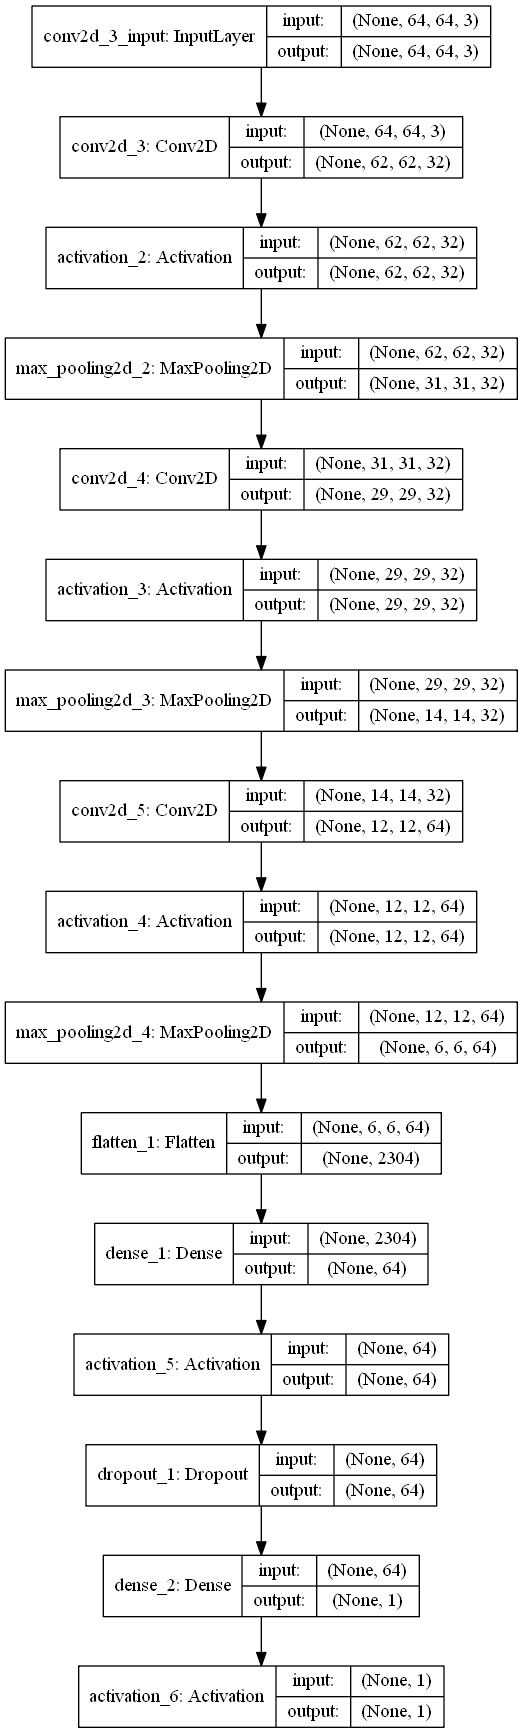

In [7]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

NameError: name 'plot_model' is not defined

In [8]:
training_set = train_datagen.flow_from_directory(
'data_set/train',
target_size=(64, 64),
batch_size=32,
class_mode='binary')

test_set = test_datagen.flow_from_directory(
'data_set/test',
target_size=(64,64),
batch_size=32,
class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
import tensorflow as tf

class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

            
my_callback = MyThresholdCallback(threshold=0.92) 
model.fit_generator(
training_set,
epochs=25,
validation_data=test_set,callbacks=[my_callback])


Epoch 1/25
163/163 [==============================] - 171s 1s/step - loss: 0.4700 - accuracy: 0.7951 - val_loss: 0.3448 - val_accuracy: 0.7837
Epoch 2/25
163/163 [==============================] - 83s 507ms/step - loss: 0.2955 - accuracy: 0.8788 - val_loss: 0.1455 - val_accuracy: 0.8750
Epoch 3/25
163/163 [==============================] - 85s 523ms/step - loss: 0.2377 - accuracy: 0.9047 - val_loss: 1.8763 - val_accuracy: 0.8109
Epoch 4/25
163/163 [==============================] - 83s 510ms/step - loss: 0.2145 - accuracy: 0.9174 - val_loss: 0.3966 - val_accuracy: 0.7596
Epoch 5/25
163/163 [==============================] - 84s 513ms/step - loss: 0.1926 - accuracy: 0.9287 - val_loss: 0.0578 - val_accuracy: 0.9087
Epoch 6/25
163/163 [==============================] - 83s 511ms/step - loss: 0.1746 - accuracy: 0.9344 - val_loss: 0.0351 - val_accuracy: 0.9135
Epoch 7/25
163/163 [==============================] - 84s 513ms/step - loss: 0.1673 - accuracy: 0.9402 - val_loss: 0.1054 - val_acc

In [12]:
model.save('93_model.h5')